### 📊 Load and Describe Data

**Purpose:**  
- Loads the Spotify/YouTube dataset into a DataFrame (`df`).
- Shows a statistical summary of all numeric columns.

**Meaning:**  
- Gives a quick overview of the data, including count, mean, std, min, max, and quartiles for each numeric feature.

**Results indicate:**  
- Helps spot outliers, missing values, and the general scale of each feature.

In [8]:
import pandas as pd

df = pd.read_csv('Spotify_Youtube.csv')
df.describe()



Unnamed: 0  Danceability        Energy           Key      Loudness  \
count  20718.000000  20716.000000  20716.000000  20716.000000  20716.000000   
mean   10358.500000      0.619777      0.635250      5.300348     -7.671680   
std     5980.915774      0.165272      0.214147      3.576449      4.632749   
min        0.000000      0.000000      0.000020      0.000000    -46.251000   
25%     5179.250000      0.518000      0.507000      2.000000     -8.858000   
50%    10358.500000      0.637000      0.666000      5.000000     -6.536000   
75%    15537.750000      0.740250      0.798000      8.000000     -4.931000   
max    20717.000000      0.975000      1.000000     11.000000      0.920000   

        Speechiness  Acousticness  Instrumentalness      Liveness  \
count  20716.000000  20716.000000      20716.000000  20716.000000   
mean       0.096456      0.291535          0.055962      0.193521   
std        0.111960      0.286299          0.193262      0.168531   
min        0.000000      0.000001          0.000000      0.014500   
25%        0.035700      0.045200          0.000000      0.094100   
50%        0.050500      0.193000          0.000002      0.125000   
75%        0.103000      0.477250          0.000463      0.237000   
max        0.964000      0.996000          1.000000      1.000000   

            Valence         Tempo   Duration_ms         Views         Likes  \
count  20716.000000  20716.000000  2.071600e+04  2.024800e+04  2.017700e+04   
mean       0.529853    120.638340  2.247176e+05  9.393782e+07  6.633411e+05   
std        0.245441     29.579018  1.247905e+05  2.746443e+08  1.789324e+06   
min        0.000000      0.000000  3.098500e+04  0.000000e+00  0.000000e+00   
25%        0.339000     97.002000  1.800095e+05  1.826002e+06  2.158100e+04   
50%        0.537000    119.965000  2.132845e+05  1.450110e+07  1.244810e+05   
75%        0.726250    139.935000  2.524430e+05  7.039975e+07  5.221480e+05   
max        0.993000    243.372000  4.676058e+06  8.079649e+09  5.078865e+07   

           Comments        Stream  
count  2.014900e+04  2.014200e+04  
mean   2.751899e+04  1.359422e+08  
std    1.932347e+05  2.441321e+08  
min    0.000000e+00  6.574000e+03  
25%    5.090000e+02  1.767486e+07  
50%    3.277000e+03  4.968298e+07  
75%    1.436000e+04  1.383581e+08  
max    1.608314e+07  3.386520e+09

### 🕳️ Check for Missing Values

**Purpose:**  
- Prints the number of missing values in each column.

**Meaning:**  
- Identifies which columns have missing data.

**Results indicate:**  
- Columns with high missing values may need cleaning or imputation.

In [13]:
print(df.isna().sum().sort_values(ascending=False))
# This shows actual missing values recognized by pandas
#print("this is panda =",df.isnull().sum())

# This also catches empty strings, which pandas might not count as null
#print((df == '').sum())



Description         876
Stream              576
Comments            569
Likes               541
official_video      470
Licensed            470
Views               470
Channel             470
Title               470
Url_youtube         470
Valence               2
Duration_ms           2
Tempo                 2
Liveness              2
Instrumentalness      2
Acousticness          2
Speechiness           2
Loudness              2
Key                   2
Energy                2
Danceability          2
Artist                0
Uri                   0
Album_type            0
Album                 0
Track                 0
Url_spotify           0
Unnamed: 0            0
dtype: int64


### 🏷️ Data Info and Album Type Counts

**Purpose:**  
- Shows info about the DataFrame (types, non-null counts).
- Displays the count of each `Album_type`.

**Meaning:**  
- Checks data types and completeness.
- Reveals class imbalance in the target variable.

**Results indicate:**  
- Most songs are albums, fewer are singles.

In [14]:
df.info()
df['Album_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

Album_type
album          14926
single          5004
compilation      788
Name: count, dtype: int64

## 🔎 Class Imbalance in `Album_type`

The bar chart above shows that the dataset is heavily **imbalanced**. Most songs are labeled as **album**, while only about 24% are labeled as **single**. This imbalance may lead models to favor the majority class if not handled properly. As a result, we must consider rebalancing strategies or use metrics like **F1-score** instead of accuracy.


### 🛠️ Clean Album Type Labels

**Purpose:**  
- Loads the dataset and merges 'compilation' into 'album' for `Album_type`.

**Meaning:**  
- Simplifies the classification problem to two classes: album and single.

**Results indicate:**  
- Ensures consistency in the target variable.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Spotify_Youtube.csv')

# Merge 'compilation' into 'album'
df['Album_type'] = df['Album_type'].replace('compilation', 'album')




### 🗂️ Album Type Distribution (Agenda)

- 🎯 **Goal**: Understand the class distribution of our target variable `Album_type`
- 📌 **Action**: Replace `compilation` with `album` to simplify classification into two categories
- 📊 **Visualization**: A pie chart showing the proportion of singles vs albums, with a legend indicating each class
- ⚠️ **Observation**: The data is imbalanced:
  - ~76% of songs are labeled as albums
  - ~24% are labeled as singles

➡️ This imbalance will impact model performance and should be handled using techniques such as class weighting, resampling, or appropriate metrics (e.g., F1-score).


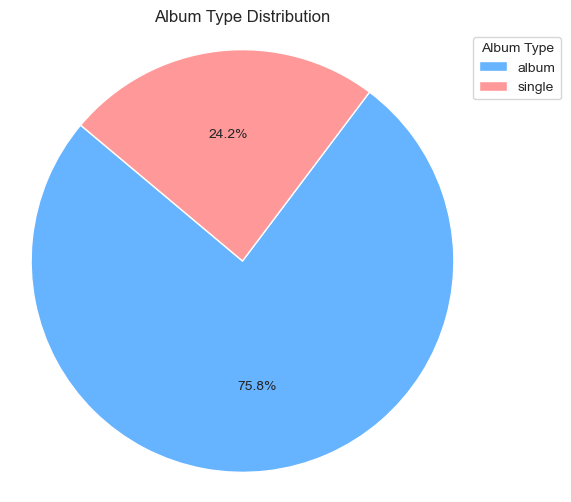

In [37]:
df['Album_type'] = df['Album_type'].replace('compilation', 'album')
counts = df['Album_type'].value_counts()

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    counts,
    labels=None,  # No labels on wedges
    autopct='%1.1f%%',
    colors=['#66b3ff', '#ff9999'],
    startangle=140
)
plt.title('Album Type Distribution')
plt.legend(wedges, counts.index, title='Album Type', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()


### 🔁 Pairplot: Musical Features by Album Type

This grid shows how singles and albums differ across multiple musical dimensions. Though overlapping, patterns suggest subtle but consistent differences in danceability and energy.


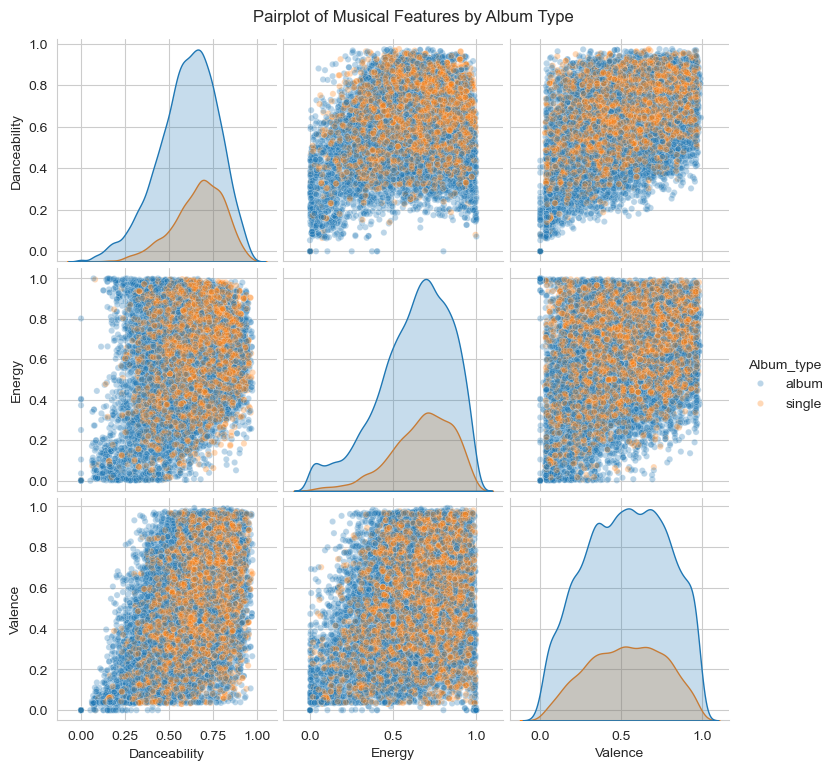

In [34]:
subset = df[['Danceability', 'Energy', 'Valence', 'Album_type']]
sns.pairplot(subset, hue='Album_type', plot_kws={'alpha': 0.3, 's': 20})
plt.suptitle('Pairplot of Musical Features by Album Type', y=1.02)
plt.show()


### 📈 Histogram: Log-Scaled YouTube Views

This plot shows the distribution of YouTube views using a log scale to reduce the effect of extreme values. The distribution is now more balanced, which makes `Views_log` a good candidate for modeling. This also confirms the presence of a few very viral songs.


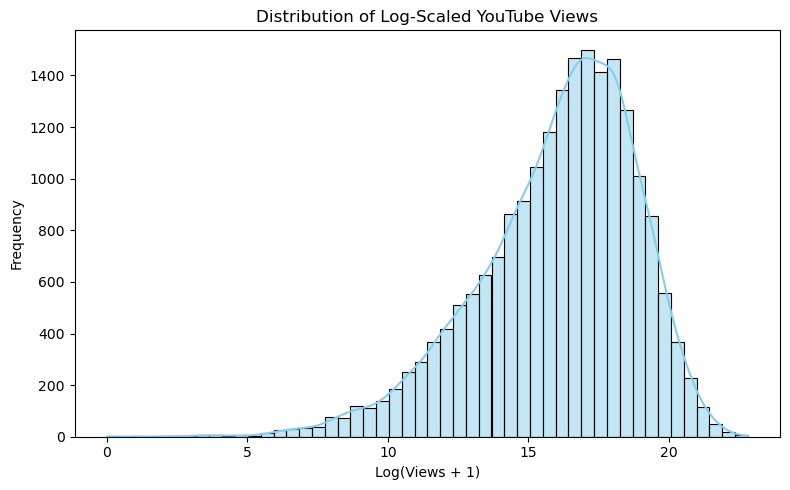

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'compilation' with 'album'
df['Album_type'] = df['Album_type'].replace('compilation', 'album')

# Create a log-transformed version of 'Views'
df['Views_log'] = np.log1p(df['Views'])

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Views_log', bins=50, kde=True, color='skyblue')
plt.title('Distribution of Log-Scaled YouTube Views')
plt.xlabel('Log(Views + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### 📦 Boxplot: Loudness by Album Type

This boxplot compares the loudness levels between singles and albums. Singles appear to have slightly higher loudness (closer to 0), which may reflect a more polished, radio-friendly production style. This could be a relevant feature for classification.


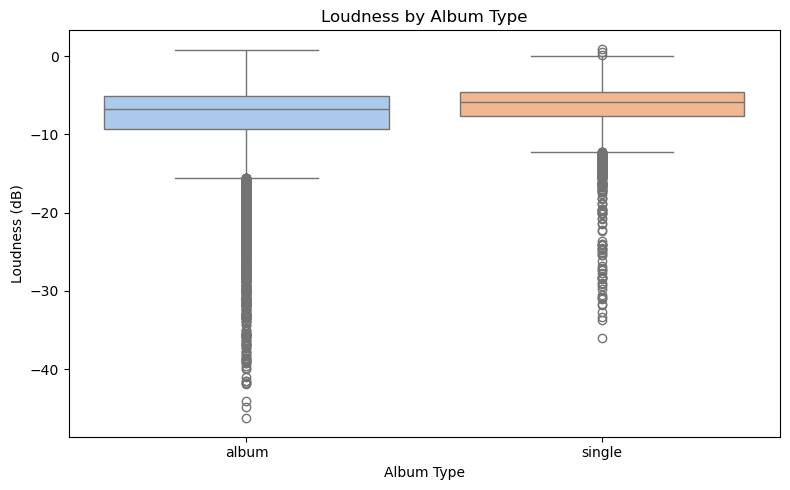

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Album_type', y='Loudness', hue='Album_type', palette='pastel', legend=False)
plt.title('Loudness by Album Type')
plt.xlabel('Album Type')
plt.ylabel('Loudness (dB)')
plt.tight_layout()
plt.show()


### 🔍 Feature Relationship Analysis

These scatter plots show key relationships between musical features:

- **Loudness vs Energy**: Strong curved correlation — louder songs are more energetic. May be redundant.
- **Valence vs Danceability**: Mild upward trend — happier songs tend to be more danceable.
- **Speechiness vs Instrumentalness**: Clear inverse relationship — songs are either spoken or instrumental, not both.
- **Valence vs Energy**: Weak positive trend — energetic songs are often more positive.
- **Danceability vs Energy**: Slight positive trend — danceable songs tend to be energetic.

These insights will help guide feature selection and transformation in Section B.


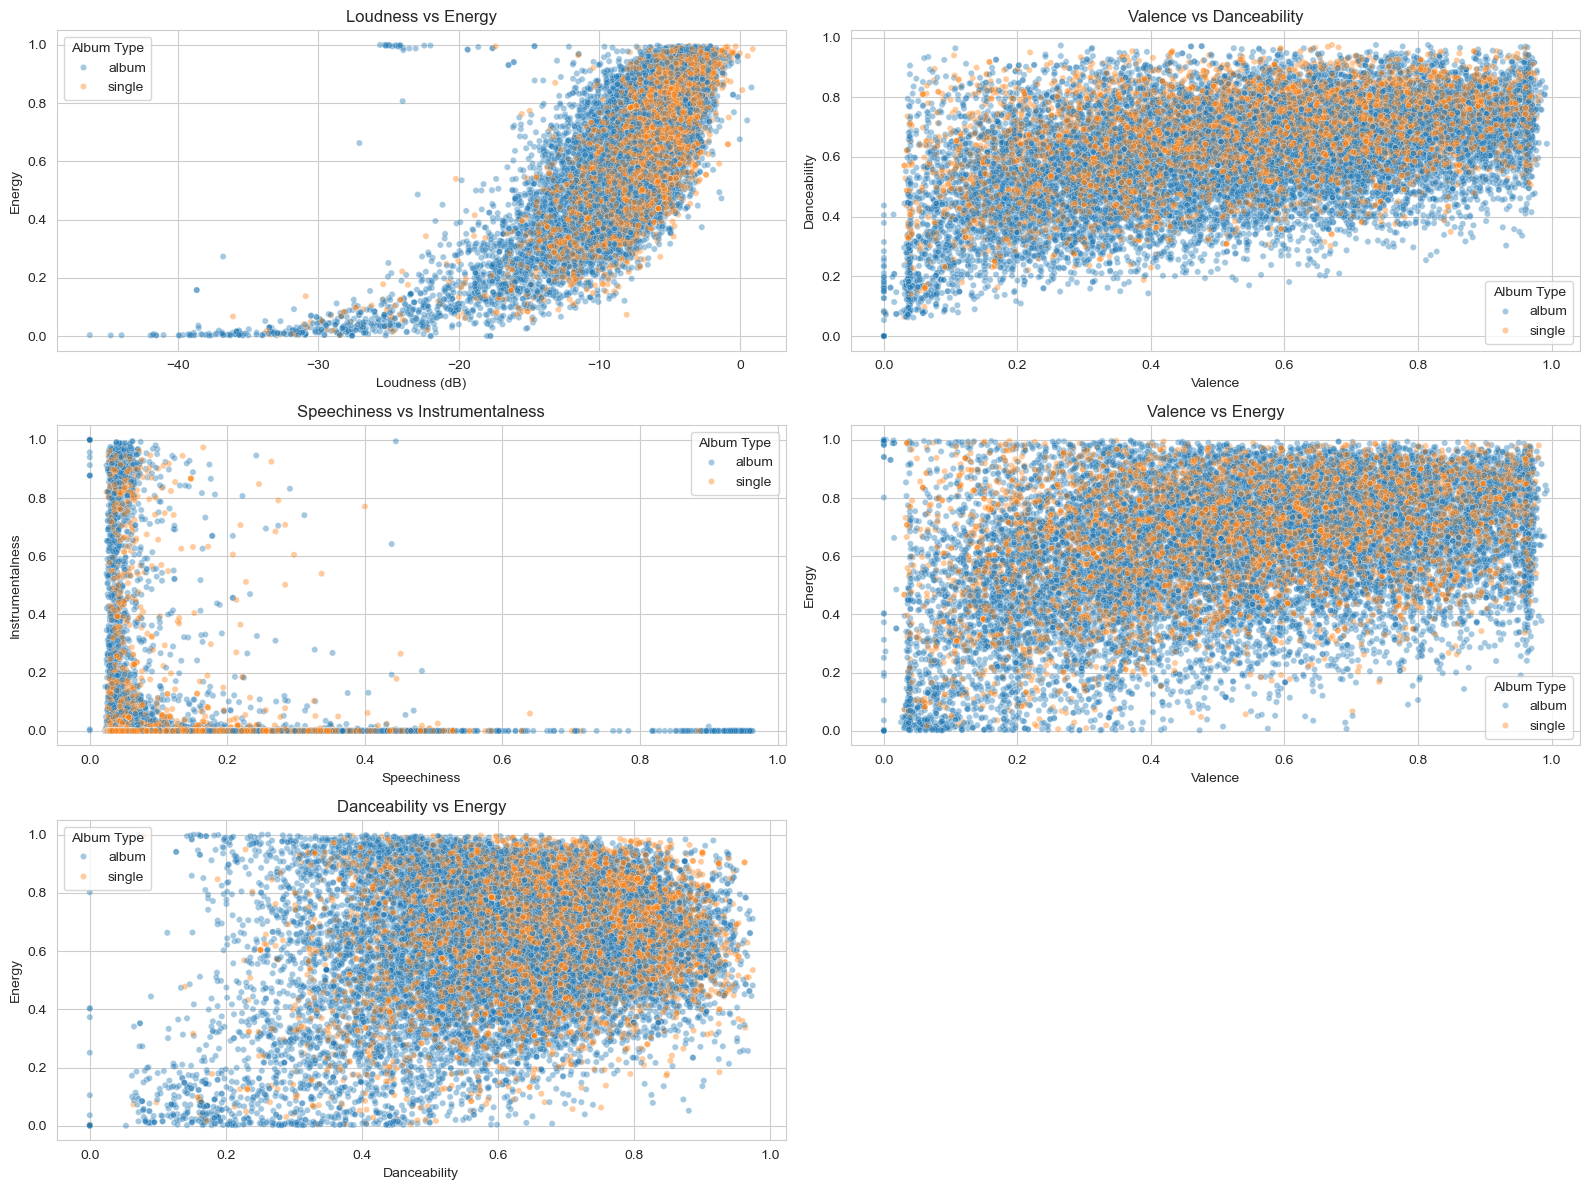

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Album_type is consistent
df['Album_type'] = df['Album_type'].replace('compilation', 'album')

plt.figure(figsize=(16, 12))

# -------- Plot 1: Loudness vs Energy --------
plt.subplot(3, 2, 1)
sns.scatterplot(data=df, x='Loudness', y='Energy', hue='Album_type', alpha=0.4, s=20)
plt.title('Loudness vs Energy')
plt.xlabel('Loudness (dB)')
plt.ylabel('Energy')
plt.legend(title='Album Type')

# -------- Plot 2: Valence vs Danceability --------
plt.subplot(3, 2, 2)
sns.scatterplot(data=df, x='Valence', y='Danceability', hue='Album_type', alpha=0.4, s=20)
plt.title('Valence vs Danceability')
plt.xlabel('Valence')
plt.ylabel('Danceability')
plt.legend(title='Album Type')

# -------- Plot 3: Speechiness vs Instrumentalness --------
plt.subplot(3, 2, 3)
sns.scatterplot(data=df, x='Speechiness', y='Instrumentalness', hue='Album_type', alpha=0.4, s=20)
plt.title('Speechiness vs Instrumentalness')
plt.xlabel('Speechiness')
plt.ylabel('Instrumentalness')
plt.legend(title='Album Type')

# -------- Plot 4: Valence vs Energy --------
plt.subplot(3, 2, 4)
sns.scatterplot(data=df, x='Valence', y='Energy', hue='Album_type', alpha=0.4, s=20)
plt.title('Valence vs Energy')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.legend(title='Album Type')

# -------- Plot 5: Danceability vs Energy --------
plt.subplot(3, 2, 5)
sns.scatterplot(data=df, x='Danceability', y='Energy', hue='Album_type', alpha=0.4, s=20)
plt.title('Danceability vs Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Album Type')

plt.tight_layout()
plt.show()



### 🔥 Correlation Heatmap Summary

- **High correlations**:
  - `Views`, `Likes`, and `Stream` are strongly correlated → keep only one.
  - `Energy` and `Loudness` show strong positive correlation → drop one to reduce redundancy.

- **Strong negative correlations**:
  - `Acousticness` is negatively correlated with both `Energy` and `Loudness`, meaning acoustic songs are softer and less energetic.

- **Low correlations**:
  - Features like `Key`, `Liveness`, and `Tempo` show weak relationships with others and may have low predictive power.

These insights help identify redundant or weak features for exclusion or transformation in Section B.
Highly correlated features (e.g., `Views` and `Likes`) are redundant and may harm model stability or lead to overfitting. To reduce multicollinearity and simplify the model, we keep only one feature from each strongly correlated pair.



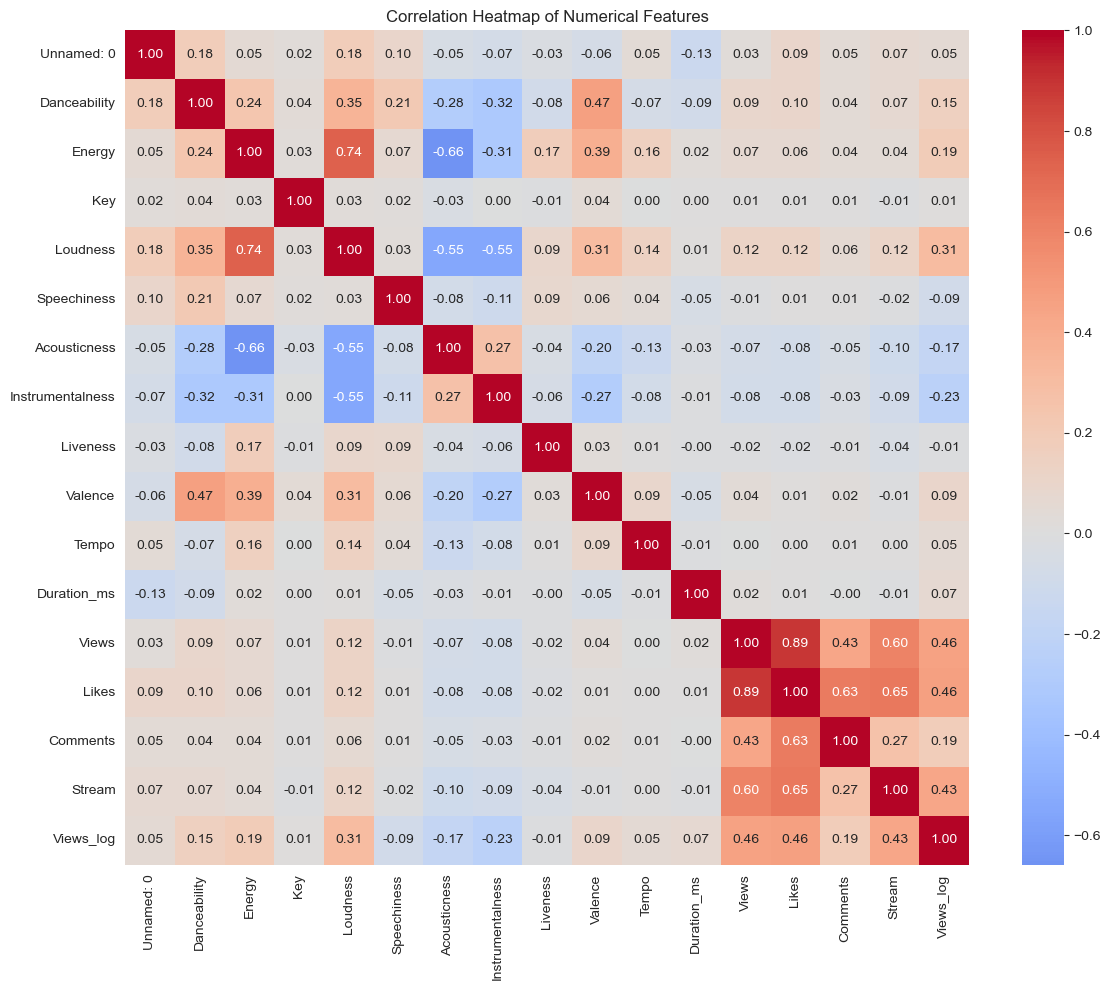

In [29]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()



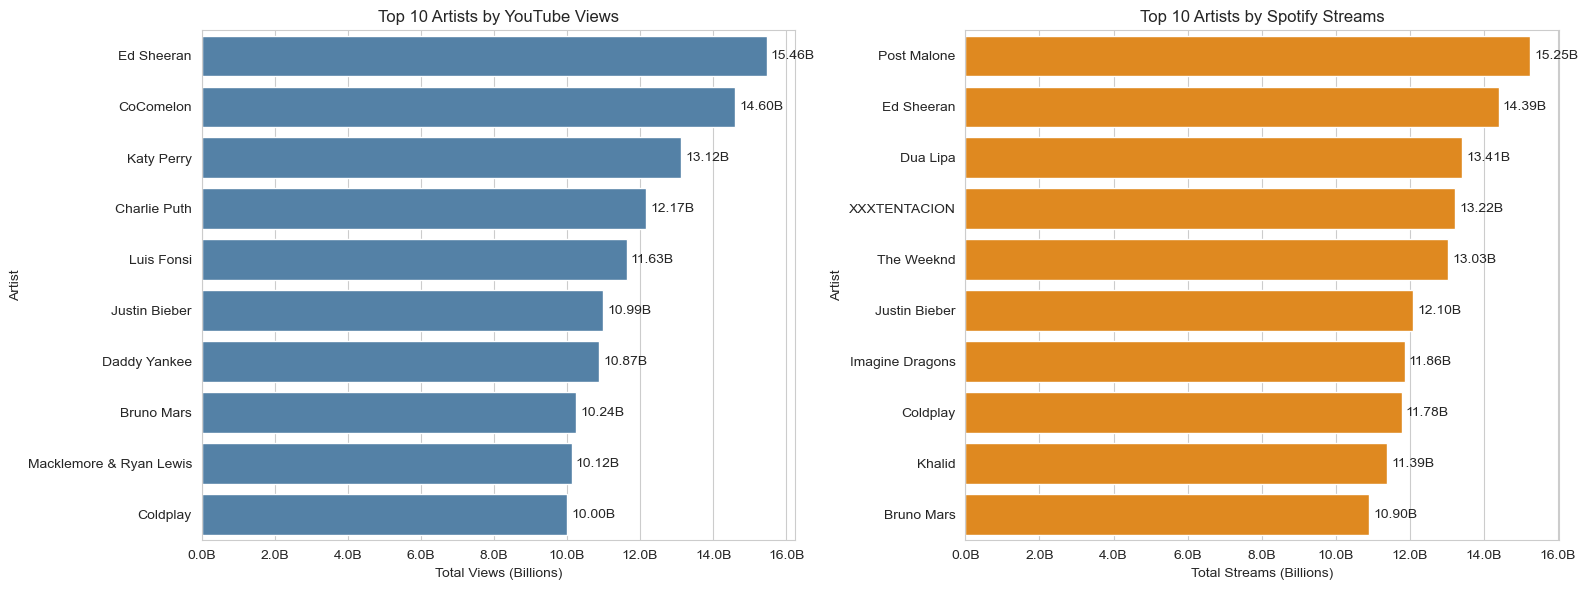

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Calculate top 10 artists by Views and Stream
top_views = df.groupby('Artist')['Views'].sum().sort_values(ascending=False).head(10)
top_stream = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False).head(10)

# Create plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot YouTube Views
bars0 = sns.barplot(x=top_views.values, y=top_views.index, ax=axes[0], color='steelblue')
axes[0].set_title('Top 10 Artists by YouTube Views')
axes[0].set_xlabel('Total Views (Billions)')
axes[0].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-9:.1f}B'))
axes[0].bar_label(bars0.containers[0], fmt=lambda x: f'{x*1e-9:.2f}B', padding=3)

# Plot Spotify Streams
bars1 = sns.barplot(x=top_stream.values, y=top_stream.index, ax=axes[1], color='darkorange')
axes[1].set_title('Top 10 Artists by Spotify Streams')
axes[1].set_xlabel('Total Streams (Billions)')
axes[1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-9:.1f}B'))
axes[1].bar_label(bars1.containers[0], fmt=lambda x: f'{x*1e-9:.2f}B', padding=3)

plt.tight_layout()
plt.show()


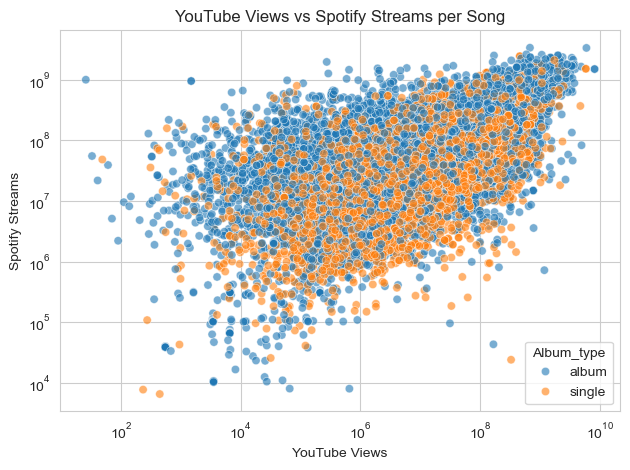

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='Views', y='Stream', hue='Album_type', alpha=0.6)
plt.title('YouTube Views vs Spotify Streams per Song')
plt.xlabel('YouTube Views')
plt.ylabel('Spotify Streams')
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

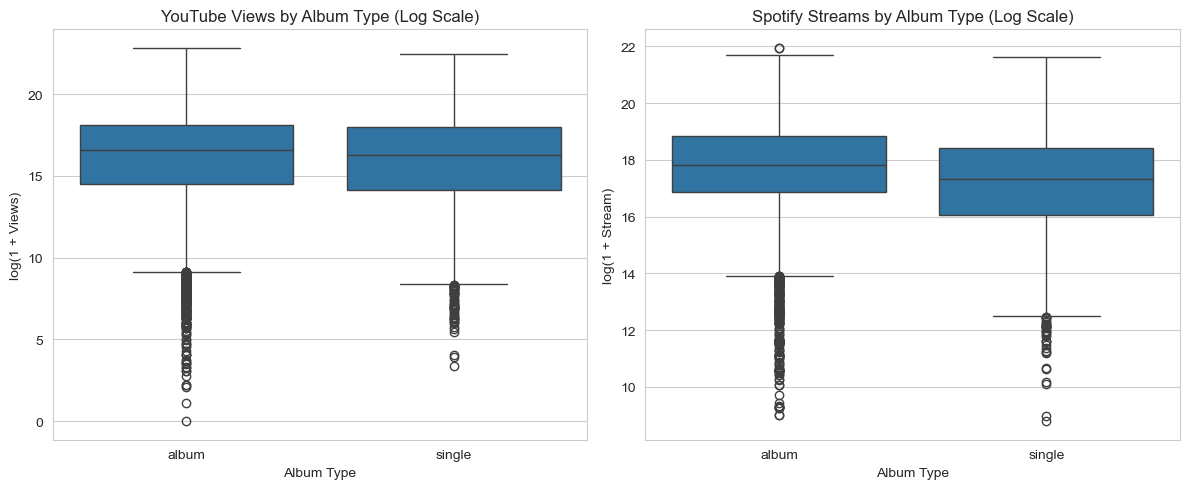

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure log columns exist
df['Views_log'] = np.log1p(df['Views'])
df['Stream_log'] = np.log1p(df['Stream'])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x='Album_type', y='Views_log', ax=axes[0])
axes[0].set_title('YouTube Views by Album Type (Log Scale)')
axes[0].set_xlabel('Album Type')
axes[0].set_ylabel('log(1 + Views)')

sns.boxplot(data=df, x='Album_type', y='Stream_log', ax=axes[1])
axes[1].set_title('Spotify Streams by Album Type (Log Scale)')
axes[1].set_xlabel('Album Type')
axes[1].set_ylabel('log(1 + Stream)')

plt.tight_layout()
plt.show()

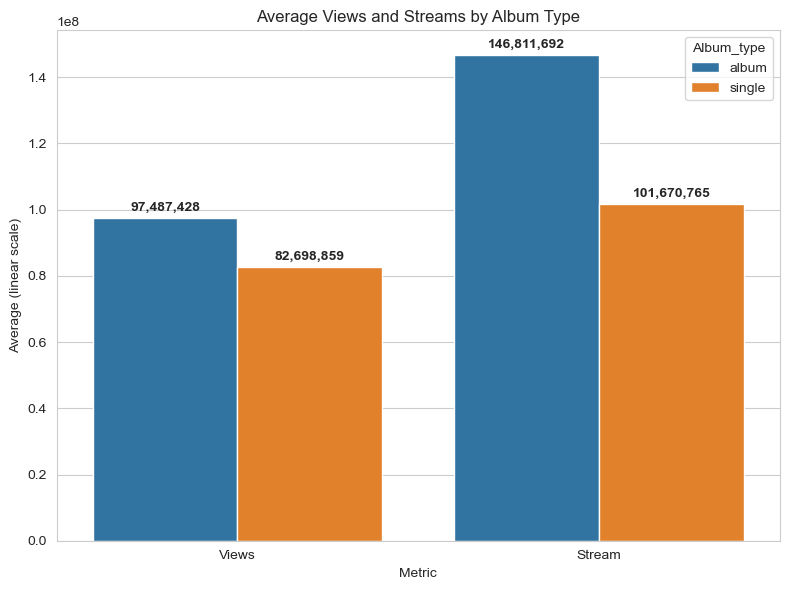

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and melt as before
agg = df.groupby('Album_type')[['Views', 'Stream']].mean().reset_index()
agg_melted = agg.melt(id_vars='Album_type', var_name='Metric', value_name='Average')

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=agg_melted, x='Metric', y='Average', hue='Album_type')

# Improved labels
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='{:,.0f}',       # Commas for clarity
        padding=3,
        fontsize=10,
        weight='bold'
    )

plt.title('Average Views and Streams by Album Type')
plt.ylabel('Average (linear scale)')
plt.tight_layout()
plt.show()


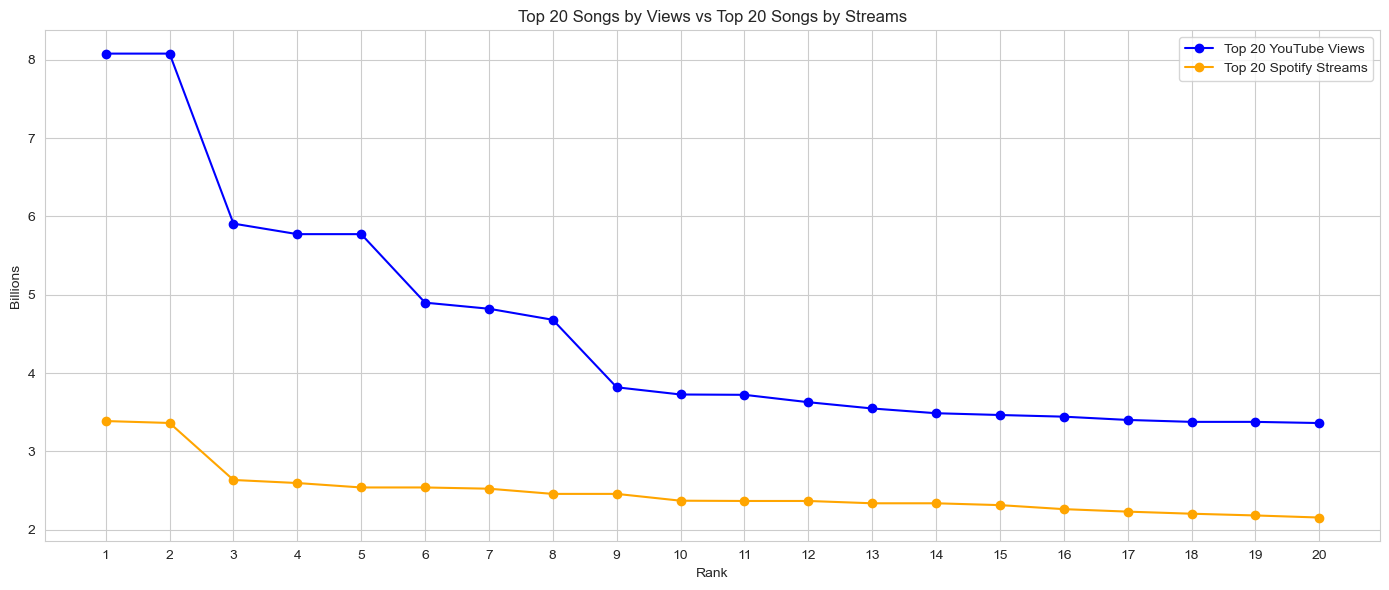

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 1. Top 20 by YouTube Views
top20_views = df.sort_values('Views', ascending=False).head(20)[['Track', 'Views']].copy()
top20_views['Views (B)'] = top20_views['Views'] / 1e9
top20_views['Rank'] = range(1, 21)

# ✅ 2. Top 20 by Spotify Streams
top20_streams = df.sort_values('Stream', ascending=False).head(20)[['Track', 'Stream']].copy()
top20_streams['Streams (B)'] = top20_streams['Stream'] / 1e9
top20_streams['Rank'] = range(1, 21)

# ✅ 3. Line Plot Comparing Top 20s
plt.figure(figsize=(14, 6))
plt.plot(top20_views['Rank'], top20_views['Views (B)'], marker='o', label='Top 20 YouTube Views', color='blue')
plt.plot(top20_streams['Rank'], top20_streams['Streams (B)'], marker='o', label='Top 20 Spotify Streams', color='orange')

plt.title('Top 20 Songs by Views vs Top 20 Songs by Streams')
plt.xlabel('Rank')
plt.ylabel('Billions')
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [81]:
from IPython.display import display, HTML

# Prepare top 20 by YouTube Views
top20_views = df.sort_values('Views', ascending=False).head(20)[['Track', 'Views', 'Stream']].copy()
top20_views['Views (B)'] = top20_views['Views'] / 1e9
top20_views['Streams (B)'] = top20_views['Stream'] / 1e9

# Prepare top 20 by Spotify Streams
top20_streams = df.sort_values('Stream', ascending=False).head(20)[['Track', 'Views', 'Stream']].copy()
top20_streams['Views (B)'] = top20_streams['Views'] / 1e9
top20_streams['Streams (B)'] = top20_streams['Stream'] / 1e9

# Style both tables
table1 = top20_views[['Track', 'Views (B)', 'Streams (B)']].style \
    .background_gradient(subset=['Views (B)', 'Streams (B)'], cmap='Blues') \
    .format({'Views (B)': '{:.2f}', 'Streams (B)': '{:.2f}'}) \
    .set_table_attributes("style='display:inline;margin-right:50px'") \
    .set_caption("Top 20 Songs by YouTube Views")

table2 = top20_streams[['Track', 'Views (B)', 'Streams (B)']].style \
    .background_gradient(subset=['Views (B)', 'Streams (B)'], cmap='Oranges') \
    .format({'Views (B)': '{:.2f}', 'Streams (B)': '{:.2f}'}) \
    .set_table_attributes("style='display:inline'") \
    .set_caption("Top 20 Songs by Spotify Streams")

# Display side by side
display(HTML(table1.to_html() + table2.to_html()))


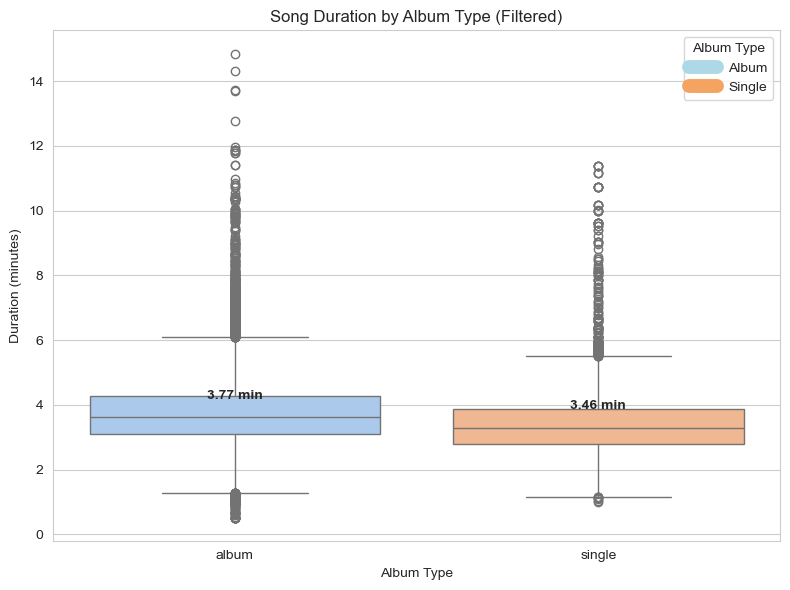

In [88]:
# Filter out extreme durations (>15 min) for clearer plot
filtered_df = df[df['Duration_min'] < 15]

plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=filtered_df,
    x='Album_type',
    y='Duration_min',
    hue='Album_type',         # Add this line
    palette='pastel',
    legend=False              # Suppress duplicate legend
)
plt.title('Song Duration by Album Type (Filtered)')
plt.ylabel('Duration (minutes)')
plt.xlabel('Album Type')

# Add mean text label
mean_durations = filtered_df.groupby('Album_type')['Duration_min'].mean()
for i, album_type in enumerate(mean_durations.index):
    ax.text(i, mean_durations[album_type] + 0.3, f"{mean_durations[album_type]:.2f} min",
            ha='center', va='bottom', fontweight='bold', fontsize=10)

# Add a legend
handles = [plt.Line2D([0], [0], color='lightblue', lw=10, label='Album'),
           plt.Line2D([0], [0], color='sandybrown', lw=10, label='Single')]
plt.legend(handles=handles, title='Album Type')

plt.tight_layout()
plt.show()


Mean duration per quartile:
 Stream_Quartile
Low         3.526394
Mid-Low     3.778831
Mid-High    3.754311
High        3.707501
Name: Duration_min, dtype: float64

Count per quartile:
 Stream_Quartile
High        5035
Mid-High    5033
Low         5028
Mid-Low     5023
Name: count, dtype: int64


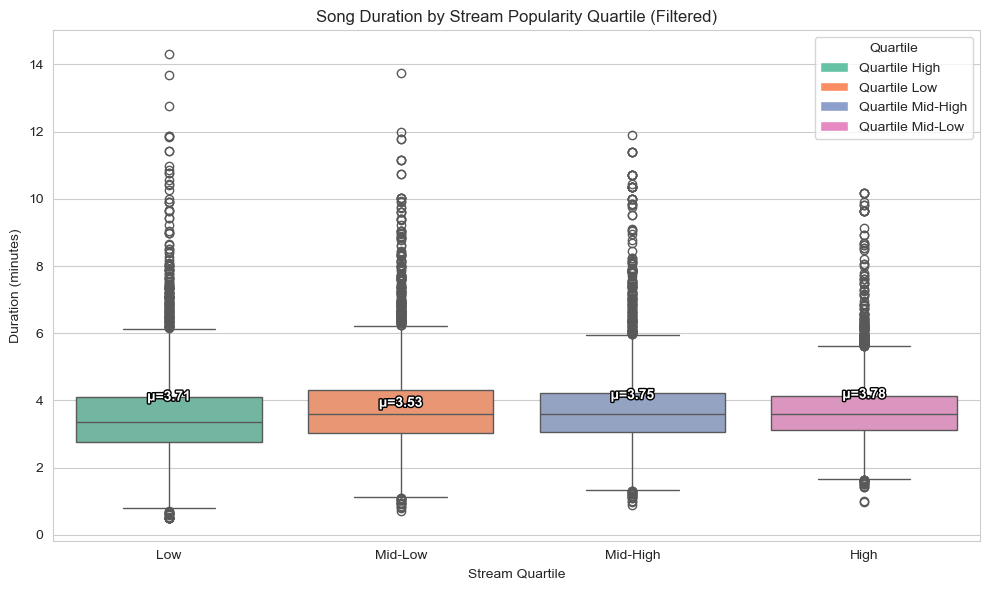

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.patheffects as pe

# Filter out extreme durations
filtered_quartile_df = df[df['Duration_min'] < 15]

# Create plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=filtered_quartile_df,
    x='Stream_Quartile',
    y='Duration_min',
    hue='Stream_Quartile',      # avoid seaborn FutureWarning
    palette='Set2',
    legend=False
)

plt.title('Song Duration by Stream Popularity Quartile (Filtered)')
plt.xlabel('Stream Quartile')
plt.ylabel('Duration (minutes)')

# Sorted quartiles
quartiles = filtered_quartile_df['Stream_Quartile'].dropna().unique()
quartiles_sorted = sorted(quartiles, key=lambda x: str(x))  # fallback to string sorting

colors = sns.color_palette('Set2', n_colors=len(quartiles_sorted))
handles = [Patch(facecolor=colors[i], label=f'Quartile {quartiles_sorted[i]}') for i in range(len(quartiles_sorted))]
plt.legend(handles=handles, title='Quartile', loc='upper right')

# ✅ FIX: Explicitly set observed=True
means = filtered_quartile_df.groupby('Stream_Quartile', observed=True)['Duration_min'].mean()

# Add mean duration text with outline
for i, q in enumerate(quartiles_sorted):
    mean_val = means[q]
    ax.text(
        i, mean_val + 0.2, f"μ={mean_val:.2f}",
        ha='center', va='bottom', fontweight='bold', fontsize=10,
        color='white',
        path_effects=[pe.withStroke(linewidth=2, foreground='black')]
    )

# Print summary
print("Mean duration per quartile:\n", means)
print("\nCount per quartile:\n", filtered_quartile_df['Stream_Quartile'].value_counts())

plt.tight_layout()
plt.show()


In [95]:
# Get actual bin edges used by qcut
_, bin_edges = pd.qcut(df['Stream'], q=4, retbins=True, duplicates='drop')
print("Quartile Thresholds (Stream):")
for i in range(len(bin_edges)-1):
    print(f"Q{i+1}: {bin_edges[i]:,.0f} to {bin_edges[i+1]:,.0f}")


Quartile Thresholds (Stream):
Q1: 6,574 to 17,674,864
Q2: 17,674,864 to 49,682,982
Q3: 49,682,982 to 138,358,065
Q4: 138,358,065 to 3,386,520,288


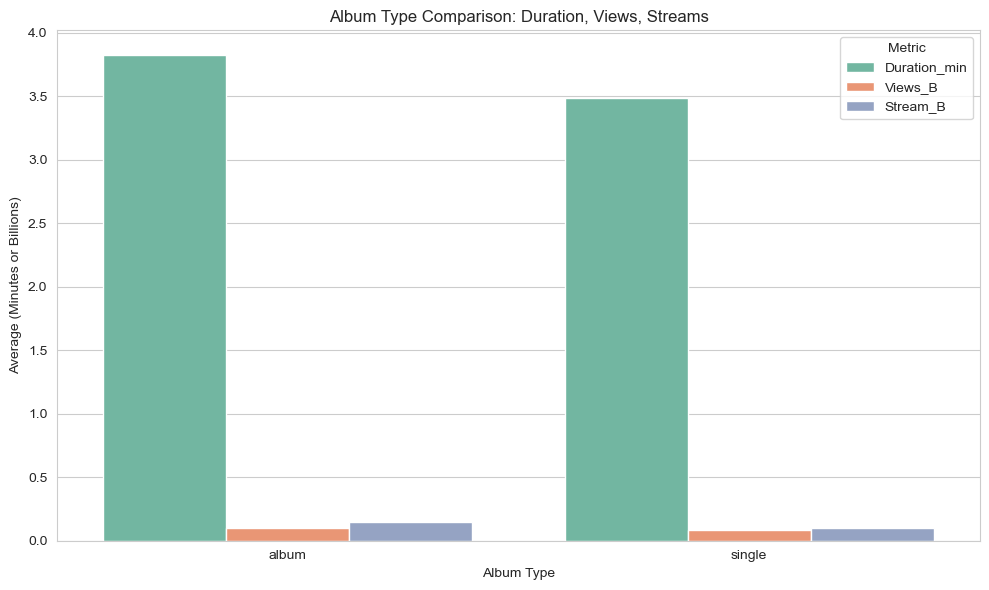

In [96]:
# Aggregate
agg_album = df.groupby('Album_type')[['Duration_min', 'Views', 'Stream']].mean().reset_index()
agg_album['Views_B'] = agg_album['Views'] / 1e9
agg_album['Stream_B'] = agg_album['Stream'] / 1e9

# Melt for seaborn
plot_df = agg_album.melt(id_vars='Album_type',
                         value_vars=['Duration_min', 'Views_B', 'Stream_B'],
                         var_name='Metric', value_name='Average')

# Bar plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Album_type', y='Average', hue='Metric', palette='Set2')
plt.title('Album Type Comparison: Duration, Views, Streams')
plt.ylabel('Average (Minutes or Billions)')
plt.xlabel('Album Type')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


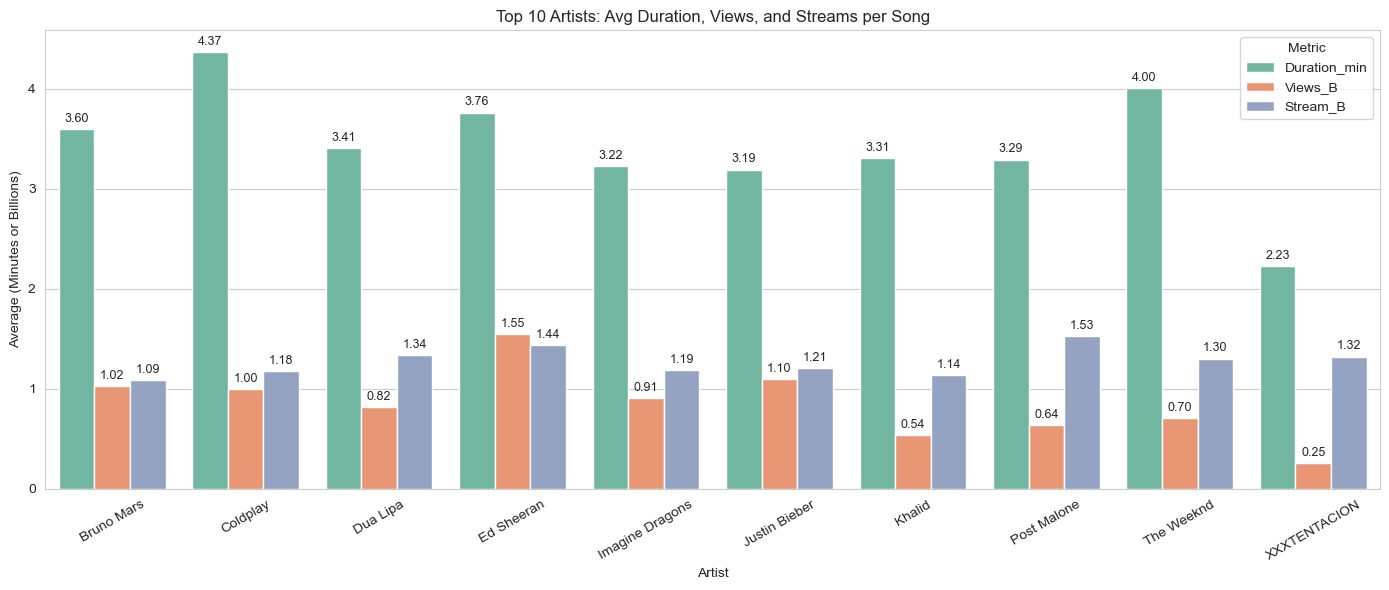

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 1. Get Top 10 Artists by Total Streams
top10_artists = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False).head(10).index
artist_df = df[df['Artist'].isin(top10_artists)]

# 🎯 2. Aggregate average stats per artist
agg_artists = artist_df.groupby('Artist')[['Duration_min', 'Views', 'Stream']].mean().reset_index()
agg_artists['Views_B'] = agg_artists['Views'] / 1e9
agg_artists['Stream_B'] = agg_artists['Stream'] / 1e9

# 🎯 3. Melt for grouped bar chart
plot_df = agg_artists.melt(id_vars='Artist',
                           value_vars=['Duration_min', 'Views_B', 'Stream_B'],
                           var_name='Metric', value_name='Average')

# 📊 4. Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=plot_df, x='Artist', y='Average', hue='Metric', palette='Set2')

# ➕ 5. Add value labels above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

plt.title('Top 10 Artists: Avg Duration, Views, and Streams per Song')
plt.ylabel('Average (Minutes or Billions)')
plt.xlabel('Artist')
plt.xticks(rotation=30)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


In [101]:
top_artists = df.groupby('Artist')['Stream'].sum().sort_values(ascending=False).head(10).index
radar_df = df[df['Artist'].isin(top_artists)].groupby('Artist')[
    ['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness']
].mean()


In [102]:
radar_norm = (radar_df - radar_df.min()) / (radar_df.max() - radar_df.min())


In [99]:
from math import pi

def plot_radar(data, title):
    labels = data.columns.tolist()
    num_vars = len(labels)

    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    plt.figure(figsize=(8, 6))
    ax = plt.subplot(111, polar=True)

    for artist in data.index:
        values = data.loc[artist].tolist()
        values += values[:1]  # loop back to start
        ax.plot(angles, values, label=artist)
        ax.fill(angles, values, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticklabels([])
    ax.set_title(title, size=14)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

# Group 1: top 5
plot_radar(radar_norm.iloc[:5], title='Top 5 Artists: Song Personality Traits')

# Group 2: next 5
plot_radar(radar_norm.iloc[5:], title='Next 5 Top Artists: Song Personality Traits')
